In [58]:
#Imports
import numpy as np
import pandas as pd
from scipy import linalg
from scipy import optimize
import sympy as sm
from scipy import interpolate

#Time
import time

#Add plot
import matplotlib.pyplot as plt # baseline modul
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D # for 3d figures
plt.style.use('seaborn-whitegrid') # whitegrid nice with 3d

# Linear regression

Consider the following **linear equation:**

$$y_i = \beta_0 + \beta_1 x_{1,i} + \beta_2 x_{2,i} + \epsilon_i$$

Assume you have access to data of the **independent variables** ($x_{1,i}$, $x_{2,i}$) and the **dependent variable** ($y_i$) for $N$ individuals, where $i$ indexes individuals. The variable $\epsilon_i$ is a mean-zero **stochastic shock**.

Assume the **data generating process** is given by:

In [59]:
def DGP(N):
    
    # a. independent variables
    x1 = np.random.normal(0,1,size=N)
    x2 = np.random.normal(0,1,size=N)
    
    # b. errors
    eps = np.random.normal(0,1,size=N)
    
    extreme = np.random.uniform(0,1,size=N)
    eps[extreme < 0.05] += np.random.normal(-5,1,size=N)[extreme < 0.05]
    eps[extreme > 0.95] += np.random.normal(5,1,size=N)[extreme > 0.95]
    
    # c. dependent variable
    y = 0.1 + 0.3*x1 + 0.5*x2 + eps
    
    return x1, x2, y

**The data you have access to is:**

In [60]:
np.random.seed(2020)
x1,x2,y = DGP(10000)

**Question 1:** Estimate the vector of coefficients $\mathbf{\beta} = (\beta_0,\beta_1,\beta_2)$ using **ordinary least squares (OLS)** implemented with **matrix algebra** by

$$ \hat{\mathbf{\beta}} = (\mathbf{X}^{\prime}\mathbf{X})^{-1}\mathbf{X}^{\prime}\mathbf{y} $$

where $\mathbf{X}^{\prime}$ is the transpose of $\mathbf{X}$ and

$$\mathbf{y} = 
\pmatrix{ y_1 \cr y_2 \cr  \vdots \cr y_N 
}
, \quad \mathbf{X} = \pmatrix{
1 & x_{1,1} & x_{2,1} \cr 
1 & x_{1,2} & x_{2,2} \cr 
\vdots & \vdots \cr 
1 & x_{1,N} & x_{2,N} 
}$$

In [61]:
# We construct our X matrix from an column of 1's, x1 and x2
Y = np.array(y)
X1 = np.array(x1)
X2 = np.array(x2)
print(y.shape) #fjernes
print(X1.shape) #fjernes
print(X2.shape) #fjernes
x0 = np.ones(shape = y.shape)
print(x0.shape) #fjernes
x_0 = np.column_stack((x0,x1))
X = np.column_stack((x_0,x2))
print(X.shape) #fjernes
print(X)

(10000,)
(10000,)
(10000,)
(10000,)
(10000, 3)
[[ 1.         -1.76884571 -0.18279442]
 [ 1.          0.07555227  0.78062368]
 [ 1.         -1.1306297  -1.01220533]
 ...
 [ 1.          0.0370484  -1.44286811]
 [ 1.          1.70892684 -0.10668645]
 [ 1.          2.06128052  0.55908184]]


In [62]:
#Now that we have our X matrix we can calculate the estimated Beta coefficient
BETA = linalg.inv(X.transpose().dot(X)).dot(X.transpose()).dot(Y)
print(BETA)
print('The Estimates for the beta coefficients is approximate correct to those of the model for y')
print(f'B_0={coeffs[0]:.1f}')
print(f'B_1={coeffs[1]:.1f}')
print(f'B_2={coeffs[2]:.1f}')

[0.0956821  0.29294299 0.50332771]
The Estimates for the beta coefficients is approximate correct to those of the model for y


NameError: name 'coeffs' is not defined

**Question 2:** Construct a 3D plot, where the data is plotted as scattered points, and the prediction of the model is given by the plane

$$\hat{y}_i = \hat{\beta}_0 + \hat{\beta}_1 x_{1,i} + \hat{\beta}_2 x_{2,i}$$

In [63]:
# We wish to plot the prediction of the model af a plane, so we construct a meshgrid 
xx1, xx2 = np.meshgrid(np.arange(-4,4,0.5),np.arange(-4,4,0.5))
y_pred_grid = B_0_hat+B_1_hat*xx1 + B_2_hat*xx2

NameError: name 'B_0_hat' is not defined

In [64]:
#We create a 3D plot
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1, projection='3d') # create a 3d axis in the figure 
ax.scatter(x1,x2,y, c='b', marker='o',s=1) # scatter the data for x_1, x_2 and y

ax.plot_wireframe(xx1, xx2, y_pred_grid, rstride=1, cstride=1, alpha = 0.3, color='Black') # plot the predicted plane

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$y$')

plt.xlim(-4, 4)
plt.ylim(-4, 4)

ax.invert_yaxis() #invert yaxis (x_2) in order to display the data distrubution in relation to the plane


NameError: name 'y_pred_grid' is not defined

**Question 3:** Esimtate the vector of coefficients $\mathbf{\beta} = (\beta_0,\beta_1,\beta_2)$ using a **numerical solver** to solve the ordinary least square problem, shown below, directly. Compare your results with the matrix algebra results.

$$ \min_{\mathbf{\beta}} \sum^N_{i=1} (y_i - (\beta_0 + \beta_1 x_{1,i} + \beta_2 x_{2,i}) )^2 $$

In [65]:
#using a numerical solver, linalg.lstsq
Numerical_solver_result=np.linalg.lstsq(X,Y)[0]
print(Numerical_solver_result)

[0.0956821  0.29294299 0.50332771]


In [66]:
#solving using numerical solver 'Nelder-Mead'
t0 = time.time()
def OLS(x):
    Beta_0 = x[0]
    Beta_1 = x[1]
    Beta_2 = x[2]
    return np.sum(np.square(Y-(Beta_0+Beta_1*X1+Beta_2*X2)))

# We set the bounds and start with the given parameter values
Guess =[0.1,0.1,0.1]

# We use the solver to maximize tax revenu given the three parameters
OLS_optimizer = optimize.minimize(OLS, Guess, method='Nelder-Mead')

# We find the optimal parameters 
Beta_0_opt=OLS_optimizer.x[0]
Beta_1_opt=OLS_optimizer.x[1]
Beta_2_opt=OLS_optimizer.x[2]

# We print the parameters and the tax revenu
print(f'Optimal Beta_0 is {Beta_0_opt:.4f}')
print(f'Optimal Beta_1 is {Beta_1_opt:.4f}')
print(f'Optimal Beta_2 is {Beta_2_opt:.4f}')

print(f'{"Nelder-Mead":12s}: {time.time()-t0:.5f} secs')

Optimal Beta_0 is 0.0957
Optimal Beta_1 is 0.2929
Optimal Beta_2 is 0.5034
Nelder-Mead : 0.02299 secs


**Question 4:** Estimate the vector of coefficients $\mathbf{\beta} = (\beta_0,\beta_1,\beta_2)$ using **least absolute deviations (LAD)** using a numerical solver to solve the following problem directly: 

$$  \min_{\beta} \sum^N_{i=1} |y_i - (\beta_0 + \beta_1 x_{1,i} + \beta_2 x_{2,i}) | $$

where $|z|$ is the absolute value of $z$.

In [67]:
#Now we use a numerical solver for the least absolute deviations (LAD) method
t0 = time.time()
def LAD(x):
    Beta_0 = x[0]
    Beta_1 = x[1]
    Beta_2 = x[2]
    return np.sum(np.abs(y-(Beta_0+Beta_1*x1+Beta_2*x2)))

# We set the bounds and start with the given parameter values
Guess =[0.1,0.1,0.1]

# We use the solver to maximize tax revenu given the three parameters
LAD_optimizer = optimize.minimize(LAD, Guess, method='SLSQP')

# We find the optimal parameters 
Beta_0_opt=LAD_optimizer.x[0]
Beta_1_opt=LAD_optimizer.x[1]
Beta_2_opt=LAD_optimizer.x[2]

# We print the parameters and the tax revenu
print(f'Optimal Beta_0 is {Beta_0_opt:.3f}')
print(f'Optimal Beta_1 is {Beta_1_opt:.3f}')
print(f'Optimal Beta_2 is {Beta_2_opt:.3f}')

print(f'{"SLSQP":12s}: {time.time()-t0:.5f} secs')

Optimal Beta_0 is 0.092
Optimal Beta_1 is 0.307
Optimal Beta_2 is 0.512
SLSQP       : 0.02798 secs


In [68]:
t0 = time.time()
def LAD(x):
    Beta_0 = x[0]
    Beta_1 = x[1]
    Beta_2 = x[2]
    return np.sum(np.abs(y-(Beta_0+Beta_1*X1+Beta_2*X2)))

# We set the bounds and start with the given parameter values
Guess =[0.1,0.1,0.1]

# We use the solver to maximize tax revenu given the three parameters
LAD_optimizer = optimize.minimize(LAD, Guess, method='Nelder-Mead')

# We find the optimal parameters 
Beta_0_opt=LAD_optimizer.x[0]
Beta_1_opt=LAD_optimizer.x[1]
Beta_2_opt=LAD_optimizer.x[2]

# We print the parameters and the tax revenu
print(f'Optimal Beta_0 is {Beta_0_opt:.3f}')
print(f'Optimal Beta_1 is {Beta_1_opt:.3f}')
print(f'Optimal Beta_2 is {Beta_2_opt:.3f}')
print(f'{"Nelder-Mead":12s}: {time.time()-t0:.5f} secs')

Optimal Beta_0 is 0.092
Optimal Beta_1 is 0.307
Optimal Beta_2 is 0.512
Nelder-Mead : 0.02399 secs


**Question 5:** Set $N = 50$. Repeat the estimation using the **OLS** and **LAD** methods $K=5000$ times, drawing a new random sample from the data generating process each time. Compare the estimates from each method using histograms. Which method do you prefer? Explain your choice.

In [69]:
#Now we need to simulate the model using OLS and LAD for:
N=50
K=5000

#We use the OLS method:
Beta_0_OLS = np.empty((K,1))
Beta_1_OLS = np.empty((K,1))
Beta_2_OLS = np.empty((K,1))

for i in range(0,K):
    np.random.seed(i)
    x1,x2,y = DGP(N)
    Y=np.array(y)
    X1=np.array(x1)
    X2=np.array(x2)
    X0=np.ones(shape=Y.shape)
    X=np.column_stack((X0,X1))
    X=np.column_stack((X,X2))
    #FInding coeffs
    coeffs_sim = linalg.inv(X.transpose().dot(X)).dot(X.transpose()).dot(Y)
    Beta_0_OLS[i] = coeffs_sim[0]
    Beta_1_OLS[i] = coeffs_sim[1]
    Beta_2_OLS[i] = coeffs_sim[2]



In [70]:
N=50
K=5000
t0 = time.time()
#We use the OLS method:
Beta_0_OLS = np.empty((K,1))
Beta_1_OLS = np.empty((K,1))
Beta_2_OLS = np.empty((K,1))

for i in range(0,K):
    np.random.seed(i)
    x1,x2,y = DGP(N)
    Y=np.array(y)
    X1=np.array(x1)
    X2=np.array(x2)
    X0=np.ones(shape=Y.shape)
    X=np.column_stack((X0,X1))
    X=np.column_stack((X,X2))
    def OLS(x):
        Beta_0 = x[0]
        Beta_1 = x[1]
        Beta_2 = x[2]
        return np.sum(np.square(y-(Beta_0+Beta_1*X1+Beta_2*X2)))

    # We set the bounds and start with the given parameter values
    Guess =[0.1,0.1,0.1]

    # We use the solver to maximize tax revenu given the three parameters
    OLS_optimizer = optimize.minimize(OLS, Guess, method='Nelder-Mead')

    #We find the optimal parameters 
    Beta_0_opt=OLS_optimizer.x[0]
    Beta_1_opt=OLS_optimizer.x[1]
    Beta_2_opt=OLS_optimizer.x[2]
    Beta_0_OLS[i] = Beta_0_opt
    Beta_1_OLS[i] = Beta_1_opt
    Beta_2_OLS[i] = Beta_2_opt

print(f'{"Nelder-Mead, OLS":12s}: {time.time()-t0:.5f} secs')


Nelder-Mead, OLS: 32.36643 secs


In [71]:
N=50
K=5000
t0_LAD = time.time()

#We use the LAD method: LAD LAD LAD
Beta_0_LAD = np.empty((K,1))
Beta_1_LAD = np.empty((K,1))
Beta_2_LAD = np.empty((K,1))

for i in range(0,K):
    np.random.seed(i)
    x1,x2,y = DGP(N)
    Y=np.array(y)
    X1=np.array(x1)
    X2=np.array(x2)
    X0=np.ones(shape=Y.shape)
    X=np.column_stack((X0,X1))
    X=np.column_stack((X,X2))
    t0 = time.time()
    def LAD(x):
        Beta_0 = x[0]
        Beta_1 = x[1]
        Beta_2 = x[2]
        return np.sum(np.abs(y-(Beta_0+Beta_1*X1+Beta_2*X2)))

    # We set the bounds and start with the given parameter values
    Guess =[0.1,0.3,0.5]

    # We use the solver to maximize tax revenu given the three parameters
    LAD_optimizer = optimize.minimize(LAD, Guess, method='SLSQP')

    #We find the optimal parameters 
    Beta_0_opt=LAD_optimizer.x[0]
    Beta_1_opt=LAD_optimizer.x[1]
    Beta_2_opt=LAD_optimizer.x[2]
    Beta_0_LAD[i] = Beta_0_opt
    Beta_1_LAD[i] = Beta_1_opt
    Beta_2_LAD[i] = Beta_2_opt

print(f'{"SLSQP, LAD":12s}: {time.time()-t0_LAD:.5f} secs')

SLSQP, LAD  : 76.54794 secs


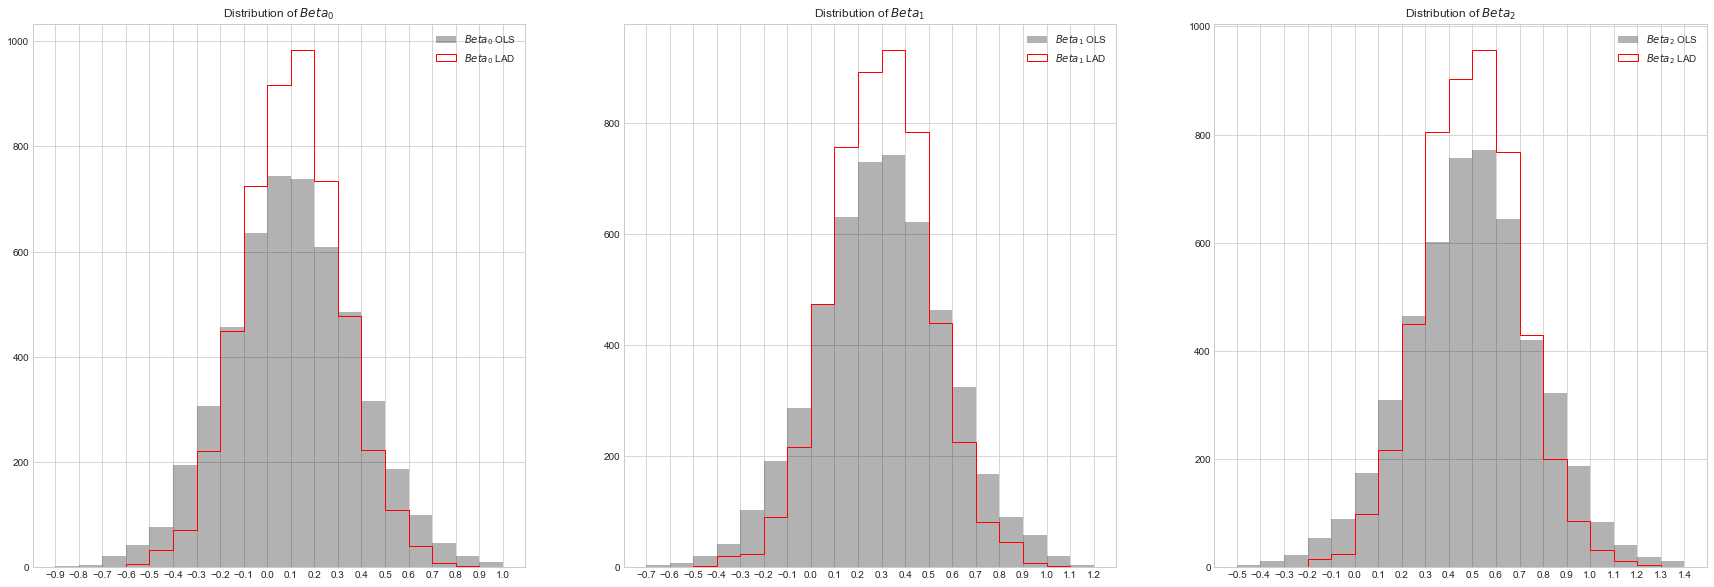

In [72]:
fig = plt.figure(figsize=(30,10))
bins = np.arange(-0.9,1.1, step=0.1)
ax = fig.add_subplot(1,3,1)
ax.hist(Beta_0_OLS, color = 'black', bins=bins, histtype='stepfilled', alpha=0.3, label='$Beta_0$ OLS')
ax.hist(Beta_0_LAD, color = 'red', bins=bins, histtype='step',label='$Beta_0$ LAD')
ax.set_title('Distribution of $Beta_0$')
plt.xticks(bins)
ax.legend(loc='upper right')

ax1 = fig.add_subplot(1,3,2)
bins1 = np.arange(-0.7,1.3, step=0.1)
ax1.hist(Beta_1_OLS, color = 'black', bins=bins1, histtype='stepfilled', alpha=0.3, label='$Beta_1$ OLS')
ax1.hist(Beta_1_LAD, color = 'red', bins=bins1, histtype='step',label='$Beta_1$ LAD')
ax1.set_title('Distribution of $Beta_1$')
plt.xticks(bins1)
ax1.legend(loc='upper right')

ax2 = fig.add_subplot(1,3,3)
bins2 = np.arange(-0.5,1.5, step=0.1)
ax2.hist(Beta_2_OLS, color = 'black', bins=bins2, histtype='stepfilled', alpha=0.3, label='$Beta_2$ OLS')
ax2.hist(Beta_2_LAD, color = 'red', bins=bins2, histtype='step',label='$Beta_2$ LAD')
ax2.set_title('Distribution of $Beta_2$')
plt.xticks(bins2)
ax2.legend(loc='upper right')

When comparing the estimated results, $\hat{\mathbf{\beta}}$, we see that they are distributed around the mean, but LAD has a higher distribution around the true value of Beta, making it the preffered estimator method in this case. This can be a result of the extreme part of the error producing some large outliers, which LAD is more resistant to. In general OLS is often preffered to LAD, but in this instance the extremes makes LAD the more precise estimator.

# Durable purchases

Consider a **household** living in two periods.

In the **second period** it gets utility from **non-durable consumption**, $c$, and **durable consumption**, $d+\chi x$:

$$
\begin{aligned}
v_{2}(m_{2},d)&= \max_{c}\frac{(c^{\alpha}(d+\chi x)^{1-\alpha})^{1-\rho}}{1-\rho}\\
\text{s.t.} \\
x &= m_{2}-c \\
c &\in [0,m_{2}]
\end{aligned}
$$

where 

* $m_2$ is cash-on-hand in the beginning of period 2
* $c$ is non-durable consumption
* $d$ is pre-commited durable consumption
* $x = m_2 - c$ is extra durable consumption
* $\rho > 1$ is the risk aversion coefficient
* $\alpha \in (0,1)$ is the utility weight on non-durable consumption
* $\chi \in (0,1)$ implies that extra durable consumption is *less* valuable than pre-comitted durable consumption
* the second constraint ensures the household *cannot* die in debt

The **value function** $v_2(m_2,d)$ measures the household's value of having $m_2$ at the beginning of period 2 with precomitted durable consumption of $d$. The optimal choice of non-durable consumption is denoted $c^{\ast}(m_2,d)$. The optimal extra durable consumption function is $x^{\ast}(m_2,d) = m_2-c^{\ast}(m_2,d)$.

Define the so-called **end-of-period 1 value function** as:

$$
\begin{aligned}
w(a,d)&\equiv\beta\mathbb{E}_{1}\left[v_2(m_2,d)\right]
\end{aligned}
$$

where 

$$
\begin{aligned}
m_2&= (1+r)a+y \\
y &= \begin{cases}
1-\Delta & \text{with prob. }\frac{1}{3}\\
1 & \text{with prob. }\frac{1}{3}\\
1+\Delta & \text{with prob. }\frac{1}{3}
\end{cases}\\
\end{aligned}
$$

and

* $a$ is assets at the end of period 1
* $\beta > 0$ is the discount factor
* $\mathbb{E}_1$ is the expectation operator conditional on information in period 1
* $y$ is income in period 2
* $\Delta \in (0,1)$ is the level of income risk (mean-preserving)
* $r$ is the return on savings

In the **first period**, the household chooses it's pre-comitted level of durable consumption for the next-period,

$$
\begin{aligned}
v_{1}(m_{1})&=\max_{d} w(a,d)\\&\text{s.t.}&\\
a&= m_{1}-d \\
d&\in [0,m_{1}]\\
\end{aligned}
$$

where $m_1$ is cash-on-hand in period 1. The second constraint ensures the household *cannot* borrow. The **value function** $v_1(m_1)$ measures the household's value of having $m_1$ at the beginning of period 1. The optimal choice of pre-committed durable consumption is denoted $d^{\ast}(m_1)$.

The **parameters** and **grids** for $m_1$, $m_2$ and $d$ should be:

In [73]:
# a. parameters
rho = 2
alpha = 0.8
beta = 0.96
r = 0.04
Delta = 0.25

# b. grids
m1_vec = np.linspace(1e-8,10,100)
m2_vec = np.linspace(1e-8,10,100)
d_vec = np.linspace(1e-8,5,100)

In [74]:
# Additionally we received information on the parameter chi, which should be set to 0.9:
chi=0.9

In [75]:
# Defining value function 2 and substituting the constraint into the value function
#def v2(c,rho,d,chi,m2,alpha):
#    return (c**alpha*(d+chi**(m2-c))**(1-alpha))**(1-rho)/(1-rho)

In [76]:
# Defining value function for period 2
def v2(c,d,alpha,rho,m2,chi):
    return (c**alpha*(d+chi*(m2-c))*(1-alpha))**(1-rho)/(1-rho) #Have substituted the constraint into the function

# Defining end of period 1 value function, w
def w(d,beta,r,m1,Delta,v2_interp):
   
    # a. w value if low income
    m2_low = (1+r)*(m1-d) + 1-Delta  #also substituting in v1's constraint a = m1-d
    v2_low = v2_interp([m2_low,d])[0] 

    # b. w value if mid income
    m2_mid = (1+r)*(m1-d) + 1        #also substituting in v1's constraint a = m1-d
    v2_mid = v2_interp([m2_mid,d])[0] 
    
    # c. w value if high income
    m2_high = (1+r)*(m1-d) + 1+Delta #also substituting in v1's constraint a = m1-d
    v2_high = v2_interp([m2_high,d])[0] 

    # d. expected w value
    return ((1/3)*v2_low + (1/3)*v2_mid + (1/3)*v2_high)*beta
    
    # e. final w
    #return w

# defining v1
def v1(d,beta,r,m1,Delta,v2_interp):
    # total value
    v1 = w
    return v1



In [ ]:
# Defining value function for period 2
def utility(c,d,alpha,rho,m2,chi):
    x = m2 - c
    return ()

**Question 1:** Find and plot the functions $v_{2}(m_{2},d)$, $c^{\ast}(m_2,d)$, and $x^{\ast}(m_2,d)$. Comment.

In [77]:
def solve_period_2(alpha,rho,chi,Delta):
   #Grids
    m2_vec = np.linspace(1e-8,10,100)
    d_vec = np.linspace(1e-8,5,100)
    v2_grid = np.empty((100,100))
    c_grid = np.empty((100,100))
    x_grid = np.empty((100,100))
    
    #Loop
    for i,m2 in enumerate(m2_vec):
        for j,d in enumerate(d_vec):

            #Objective
            obj = lambda c: -v2(c,d,alpha,rho,m2,chi)

            #initial value
            x0 = m2/2

            #Optimize
            result = optimize.minimize_scalar(obj,x0,method='bounded',bounds=[1e-8,m2])

            # iv. save
            v2_grid[i,j] = -result.fun
            c_grid[i,j] = result.x
            x_grid[i,j] = m2 - result.x

    return m2_vec,d_vec,v2_grid,c_grid,x_grid


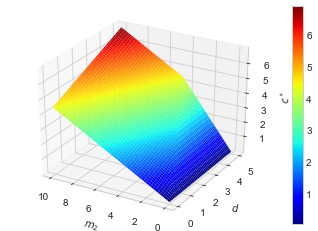

In [78]:
# a. solve
m2_vec,d_vec,v2_grid,c_grid,x_grid = solve_period_2(alpha,rho,chi,Delta)

# b. grids
m2_grid,d_grid = np.meshgrid(m2_vec,d_vec,indexing='ij')

# c. main
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
cs = ax.plot_surface(m2_grid,d_grid,c_grid,cmap=cm.jet)

# d. add labels
ax.set_xlabel('$m_2$')
ax.set_ylabel('$d$')
ax.set_zlabel('$c^*$')

# e. invert xaxis
ax.invert_xaxis()

# f. add colorbar
fig.colorbar(cs);

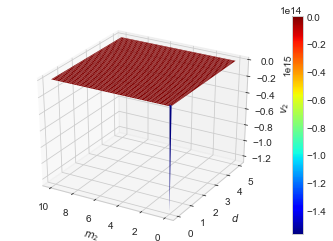

In [79]:
m2_vec,d_vec,v2_grid,c_grid,x_grid = solve_period_2(alpha,rho,chi,Delta)

# b. grids
m2_grid,d_grid = np.meshgrid(m2_vec,d_vec,indexing='ij')

# c. main
fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection='3d')
cs = ax.plot_surface(m2_grid,d_grid,v2_grid,cmap=cm.jet)

# d. add labels
ax.set_xlabel('$m_2$')
ax.set_ylabel('$d$')
ax.set_zlabel('$v_2$')

# e. invert xaxis
ax.invert_xaxis()

# f. add colorbar
fig.colorbar(cs);

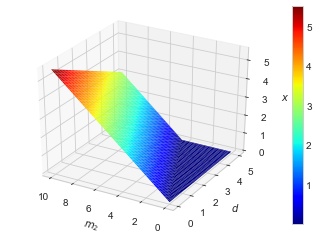

In [80]:
m2_vec,d_vec,v2_grid,c_grid,x_grid = solve_period_2(alpha,rho,chi,Delta)

# b. grids
m2_grid,d_grid = np.meshgrid(m2_vec,d_vec,indexing='ij')

# c. main
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
cs = ax.plot_surface(m2_grid,d_grid,x_grid,cmap=cm.jet)

# d. add labels
ax.set_xlabel('$m_2$')
ax.set_ylabel('$d$')
ax.set_zlabel('$x$')

# e. invert xaxis
ax.invert_xaxis()

# f. add colorbar
fig.colorbar(cs);

In [81]:
def solve_period_1(alpha,rho,beta,r,Delta,v2_interp):
    # a. grids
    m1_vec = np.linspace(1e-8,10,100)
    v1_vec = np.empty(100)
    d_vec = np.empty(100)
    
    #Loop
    for i,m1 in enumerate(m1_vec):

        #Obejctive
        #c = 
        obj = lambda d: -w(d,beta,r,m1,Delta,v2_interp)
        #obj = lambda d: -w(d,beta,r,m1,Delta,v2_interp)

        #initial value
        x0 = m1*1/2
        #x0 = m1*1/2

        #Bounds
        #bound = (1e-8,m1-1e-8)
        #bounds = (bound)
        #ineq_con = {'type': 'ineq', 'fun': lambda x: m1-d} 

        #Optimize
        #result = optimize.minimize(obj,x0, method='SLSQP',
        #                          bounds=bounds,
        #                          constraints=[ineq_con])
        
        result = optimize.minimize_scalar(obj,x0,method='bounded',bounds=[1e-8,m1])
        #result = optimize.minimize_scalar(obj,x0,method='Nelder-Mead')
        #result = optimize.minimize(obj,[x0], method='L-BFGS-B',bounds=([1e-8,m1],))

        # iv. save
        v1_vec[i] = -result.fun
        d_vec[i] = result.x

    return m1_vec,v1_vec,d_vec

Text(0.5, 0, '$m_1$')

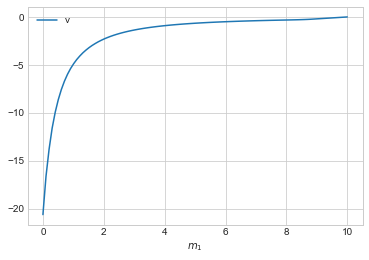

In [82]:
v2_interp = interpolate.RegularGridInterpolator([m2_vec,d_vec],v2_grid,bounds_error=False,fill_value=None)
#c_interp = interpolate.RegularGridInterpolator([m2_vec,d_vec],c_grid,bounds_error=False,fill_value=None)

m1_vec,v1_vec,d_vec = solve_period_1(alpha,rho,beta,r,Delta,v2_interp)

# d. plot
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(m1_vec,v1_vec,label='v')
#ax.plot(m1_vec,d_vec,label='d')
ax.legend(loc='upper left')
ax.set_xlabel('$m_1$')
#ax.set_xlim([0,100])
#ax.set_ylim([0,100]);

Text(0.5, 0, '$m_1$')

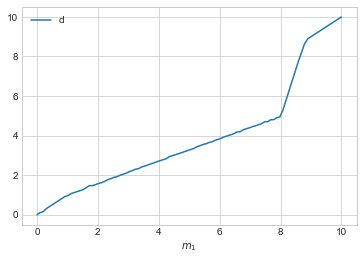

In [83]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.plot(m1_vec,d_vec,label='d')
ax.legend(loc='upper left')
ax.set_xlabel('$m_1$')

In [84]:
def solve_period_2(alpha,rho,chi,Delta):

    # a. grids (from before)
    m2_vec = np.linspace(1e-8,10,100)
    v2_vec = np.empty((100,100))
    c_vec = np.empty((100,100))

    # b. solve for each m2 in grid

    for i,m2 in enumerate(m2_vec):
    
            # i. objective
            obj = lambda c: -v2(c,alpha,d,rho,m2,chi)

            # ii. initial value (consume half)
            x0 = m2/2

            # iii. optimizer
            result = optimize.minimize_scalar(obj,x0,method='bounded',bounds=[1e-8,m1])

            # iv. save
            v2_vec[i] = -result.fun
            c_vec[i] = result.x
        
    return m2_vec,v2_vec,c_vecdef solve_period_2(alpha,rho,chi,Delta):

    # a. grids (from before)
    m2_vec = np.linspace(1e-8,10,100)
    v2_vec = np.empty((100,100))
    c_vec = np.empty((100,100))

    # b. solve for each m2 in grid

    for i,m2 in enumerate(m2_vec):
    
            # i. objective
            obj = lambda c: -v2(c,alpha,d,rho,m2,chi)

            # ii. initial value (consume half)
            x0 = m2/2

            # iii. optimizer
            result = optimize.minimize_scalar(obj,x0,method='bounded',bounds=[1e-8,m2])

            # iv. save
            v2_vec[i] = -result.fun
            c_vec[i] = result.x
        
    return m2_vec,v2_vec,c_vec

SyntaxError: invalid syntax (<ipython-input-84-9bf1acdecf78>, line 25)

In [85]:
def solve_period_2(rho, d, alpha, beta, chi, r, Delta):

    # a. grids
    m2_vec = np.linspace(1e-8,10,100)
    d_vec = np.linspace(1e-8,5,100)
    c_vec = np.empty(100)
    v2_vec = np.empty(100)
    x_vec = np.empty(100)


    # b. solve for each m2 in grid
    for i,m2 in enumerate(m2_vec):

        # i. objective
        obj = lambda w: -v2(d,beta,r,m1,Delta,v2_interp)

        # ii. initial value (consume half)
        x0 = m2/2

        # iii. optimizer
        result = optimize.minimize_scalar(obj,x0,method='bounded',bounds=[1e-8,m2])

        # Finding c
       # c_vec[i] = 

        # Finding x
        x_vec[i] = m2_vec[i]-c_vec[i]


        # iv. save
        v2_vec[i] = -result.fun
        d_vec[i] = result.x
        
    return m2_vec,v2_vec,c_vec,x_vec

# solve
m2_vec,v2_vec,c_vec,x_vec = solve_period_2(rho, d, alpha, beta, chi, r, Delta)

# illustration
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(1,2,1)
ax.plot(m2_vec,d_vec)
ax.set_xlabel('$m_2$')
ax.set_ylabel('$d_2$')
ax.set_title('consumption function in period 2')

ax = fig.add_subplot(1,2,2)
ax.plot(m2_vec,m1_vec)
ax.set_xlabel('$m_2$')
ax.set_ylabel('$m_1$')
ax.set_title('value function in period 2')
ax.set_ylim([-40,1]);

NameError: name 'd' is not defined

**Question 2:** Find and plot the functions $v_{1}(m_{1})$ and $d^{\ast}(m_1)$. Comment.

**Hint:** For interpolation of $v_2(m_2,d)$ consider using `interpolate.RegularGridInterpolator([GRID-VECTOR1,GRID-VECTOR2],VALUE-MATRIX,bounds_error=False,fill_value=None)`.

Next, consider an **extension** of the model, where there is also a **period 0**. In this period, the household makes a choice whether to stick with the level of durables it has, $z = 0$, or adjust its stock of durables, $z = 1$. If adjusting, the household loses a part of the value of its durable stock; more specificaly it incurs a proportional loss of $\Lambda \in (0,1)$.

Mathematically, the **household problem in period 0** is:

$$
\begin{aligned}
v_{0}(m_{0},d_{0}) &= \max_{z\in\{0,1\}} \begin{cases}
w(m_{0},d_{0}) & \text{if } z = 0\\
v_1(m_0+(1-\Lambda) d_{0}) & \text{if } z = 1\\
\end{cases}\\
\end{aligned}
$$

The **parameters** and **grids** for $m_0$ and $d_0$ should be:

In [86]:
Lambda = 0.2
m0_vec = np.linspace(1e-8,6,100)
d0_vec = np.linspace(1e-8,3,100)

**Question 3:** For which values of $m_0$ and  $d_0$ is the optimal choice not to adjust, i.e. $z = 0$? Show this in a plot. Give an interpretion of your results.

# Gradient descent

Let $\boldsymbol{x} = \left[\begin{array}{c}
x_1 \\
x_2\\
\end{array}\right]$ be a two-dimensional vector. Consider the following algorithm:

**Algorithm:** `gradient_descent()`

**Goal:** Minimize the function $f(\boldsymbol{x})$.

1. Choose a tolerance $\epsilon>0$, a scale factor $ \Theta > 0$, and a small number $\Delta > 0$
2. Guess on $\boldsymbol{x}_0$ and set $n=1$
3. Compute a numerical approximation of the jacobian for $f$ by

    $$
    \nabla f(\boldsymbol{x}_{n-1}) \approx \frac{1}{\Delta}\left[\begin{array}{c}
    f\left(\boldsymbol{x}_{n-1}+\left[\begin{array}{c}
    \Delta\\
    0
    \end{array}\right]\right)-f(\boldsymbol{x}_{n-1})\\
    f\left(\boldsymbol{x}_{n-1}+\left[\begin{array}{c}
    0\\
    \Delta
    \end{array}\right]\right)-f(\boldsymbol{x}_{n-1})
    \end{array}\right]
    $$

4. Stop if the maximum element in $|\nabla f(\boldsymbol{x}_{n-1})|$ is less than $\epsilon$
5. Set $\theta = \Theta$ 
6. Compute $f^{\theta}_{n} = f(\boldsymbol{x}_{n-1} - \theta \nabla f(\boldsymbol{x}_{n-1}))$
7. If $f^{\theta}_{n} < f(\boldsymbol{x}_{n-1})$ continue to step 9
8. Set $\theta = \frac{\theta}{2}$ and return to step 6     
9. Set $x_{n} = x_{n-1} - \theta \nabla f(\boldsymbol{x}_{n-1})$
10. Set $n = n + 1$ and return to step 3

**Question:** Implement the algorithm above such that the code below can run.

**Optimizer function:**

In [87]:
def gradient_descent(f,x0,epsilon=1e-6,Theta=0.1,Delta=1e-8,max_iter=10_000):
    """minimize function with gradient descent
        
    Args:

        f (callable): function 
        x0 (np.array): initial values
        epsilon (float): tolerance
        Theta (float): scale factor
        Delta (float): a small number bigger than zero
        max_iter (int): maximum number of iterations
        
        
    Returns:
    
        x (np.array): minimum
        n (int): number of iterations used
        
    """
#Step 1: Choose a tolerance epsilon > 0, a scale factor Theta > 0, and a small number delta >0
    #epsilon = 1e-6
    #Theta = 0.1
    #Delta = 1e-8
#Step 2: Guessing on x0 and setting n=1
    x = x0
    fx = f(x0)
    n=1
#Step 3-10: Iteration
    while n < max_iter:
        x_prev = x
        fx_prev = fx
        #Step 3: Numerical approximation of the two-dimoensional Jacobian function:
        jac1 = f(x_prev + np.array([Delta,0])) - f(x_prev)
        jac2 = f(x_prev + np.array([0,Delta])) - f(x_prev)
        jac = 1/Delta * np.array([jac1,jac2])

        #Step 4: Stop if max value < tolerance
        #if np.max(jac) < epsilon: - Works without absoluate value as well since the function is positive. 
        if np.max(abs(jac)) < epsilon:
            break
        #Step 5: Set theta = Theta
        theta = Theta

        #Step 6: Updating fx value
        fx = f(x_prev - theta*jac)

        #Step 7-8: Iterate over theta untill value decreases
        while fx >= f(x_prev):
            theta = theta/2
            fx = f(x_prev - theta * jac)
        #Step 9: Update x value
        x = x_prev - theta * jac
        #Step 10: Set n=n+1
        n += 1
    return x,n

**Test case:**

In [88]:
def rosen(x):
    return (1.0-x[0])**2+2*(x[1]-x[0]**2)**2

x0 = np.array([1.1,1.1])
try:
    x,it = gradient_descent(rosen,x0)
    print(f'minimum found at ({x[0]:.4f},{x[1]:.4f}) after {it} iterations')
    assert np.allclose(x,[1,1])
except:
    print('not implemented yet')

minimum found at (1.0000,1.0000) after 306 iterations
